In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Loading dataset**

In [2]:
df = pd.read_csv(r"C:\Users\Shuvam\Downloads\vgchartz-2024.csv")
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [3]:
df.drop(columns=['img'],inplace = True)

# Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         64016 non-null  object 
 1   console       64016 non-null  object 
 2   genre         64016 non-null  object 
 3   publisher     64016 non-null  object 
 4   developer     63999 non-null  object 
 5   critic_score  6678 non-null   float64
 6   total_sales   18922 non-null  float64
 7   na_sales      12637 non-null  float64
 8   jp_sales      6726 non-null   float64
 9   pal_sales     12824 non-null  float64
 10  other_sales   15128 non-null  float64
 11  release_date  56965 non-null  object 
 12  last_update   17879 non-null  object 
dtypes: float64(6), object(7)
memory usage: 6.3+ MB


In [5]:
df.columns

Index(['title', 'console', 'genre', 'publisher', 'developer', 'critic_score',
       'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales',
       'release_date', 'last_update'],
      dtype='object')

In [6]:
continous = ['critic_score','total_sales', 'na_sales','jp_sales', 'pal_sales', 'other_sales']
discrete_categorical = ['title','console','genre','publisher','developer'] 

In [7]:
df[continous].describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


In [8]:
df[discrete_categorical].describe()

,title,console,genre,publisher,developer
count,64016,64016,64016,64016,63999
unique,39798,81,20,3383,8862
top,Plants vs. Zombies,PC,Misc,Unknown,Unknown
freq,17,12617,9304,8842,4435


In [9]:
df['title'].unique()

array(['Grand Theft Auto V', 'Grand Theft Auto: Vice City',
       'Call of Duty: Black Ops 3', ..., 'Yoru, Tomosu',
       'Yunohana SpRING! ~Mellow Times~',
       'Yurukill: The Calumniation Games'], dtype=object)

In [10]:
df['title'].value_counts()

title
Plants vs. Zombies                  17
Pac-Man                             16
Monopoly                            15
Doom                                14
Double Dragon                       14
                                    ..
Bakegyamon: Ayakashi Fighting        1
Avatar Showdown                      1
Avatar Fighter Online                1
Avatar Fighter                       1
Yurukill: The Calumniation Games     1
Name: count, Length: 39798, dtype: int64

In [11]:
df['console'].unique()

array(['PS3', 'PS4', 'PS2', 'X360', 'XOne', 'PC', 'PSP', 'Wii', 'PS',
       'DS', '2600', 'GBA', 'NES', 'XB', 'PSN', 'GEN', 'PSV', 'DC', 'N64',
       'SAT', 'SNES', 'GBC', 'GC', 'NS', '3DS', 'GB', 'WiiU', 'WS', 'VC',
       'NG', 'WW', 'SCD', 'PCE', 'XBL', '3DO', 'GG', 'OSX', 'Mob', 'PCFX',
       'Series', 'All', 'iOS', '5200', 'And', 'DSiW', 'Lynx', 'Linux',
       'MS', 'ZXS', 'ACPC', 'Amig', '7800', 'DSi', 'AJ', 'WinP', 'iQue',
       'GIZ', 'VB', 'Ouya', 'NGage', 'AST', 'MSD', 'S32X', 'XS', 'PS5',
       'Int', 'CV', 'Arc', 'C64', 'FDS', 'MSX', 'OR', 'C128', 'CDi',
       'CD32', 'BRW', 'FMT', 'ApII', 'Aco', 'BBCM', 'TG16'], dtype=object)

In [12]:
df['console'].value_counts()

console
PC      12617
PS2      3565
DS       3288
PS4      2878
PS       2707
        ...  
TG16        3
FDS         1
C128        1
Aco         1
BBCM        1
Name: count, Length: 81, dtype: int64

In [13]:
df['genre'].unique()

array(['Action', 'Shooter', 'Action-Adventure', 'Sports', 'Role-Playing',
       'Simulation', 'Racing', 'Music', 'Misc', 'Fighting', 'Platform',
       'Adventure', 'Strategy', 'Puzzle', 'MMO', 'Sandbox', 'Party',
       'Education', 'Board Game', 'Visual Novel'], dtype=object)

In [14]:
df['publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', ...,
       "Mind's Eclipse Interactive", 'Walkabout', 'InvertMouse'],
      dtype=object)

In [15]:
df['publisher'].value_counts()

publisher
Unknown               8842
Sega                  2207
Ubisoft               1663
Electronic Arts       1619
Activision            1582
                      ... 
Cancer Research UK       1
XperimentalZ Games       1
Nano Games               1
Cooking Mama Ltd.        1
PLAYDIUS                 1
Name: count, Length: 3383, dtype: int64

In [16]:
df['developer'].unique()

array(['Rockstar North', 'Treyarch', 'Infinity Ward', ...,
       'Different Tales', '4D Door Games', 'InvertMouse'], dtype=object)

In [17]:
df['developer'].value_counts()

developer
Unknown             4435
Konami               976
Sega                 915
Capcom               870
Namco                489
                    ... 
Solutions 2 Go         1
Whampashimash          1
Redwind Software       1
Iron Square            1
Paretto                1
Name: count, Length: 8862, dtype: int64

In [18]:
df['release_date'].describe()

count          56965
unique          7922
top       1994-01-01
freq             515
Name: release_date, dtype: object

In [19]:
['title','console','genre','publisher','developer'] 

['title', 'console', 'genre', 'publisher', 'developer']

<Axes: xlabel='count', ylabel='genre'>

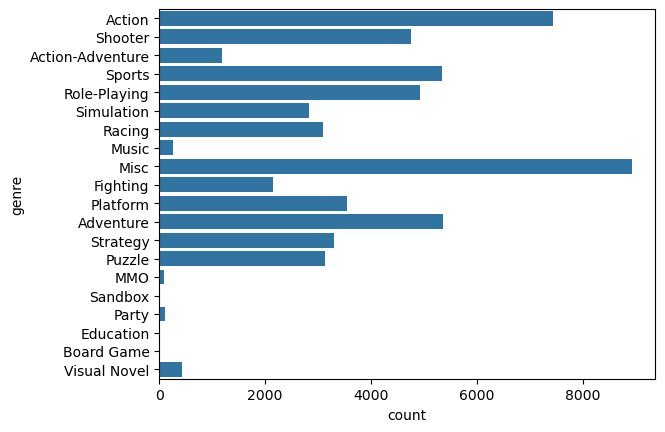

In [47]:

sns.countplot(df['genre'])




<Axes: xlabel='other_sales', ylabel='Count'>

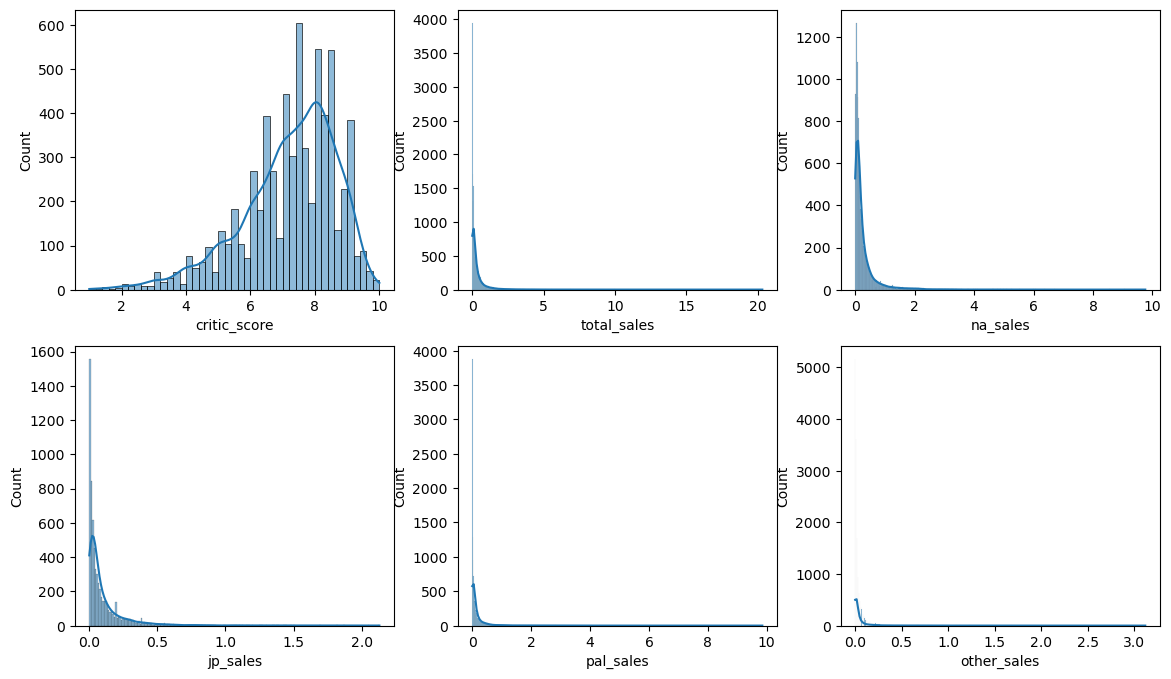

In [21]:
# to visualise skewness 
plt.figure(figsize=(14,8))

plt.subplot(2,3,1)
sns.histplot(df['critic_score'],kde=1)

plt.subplot(2,3,2)
sns.histplot(df['total_sales'],kde=1)

plt.subplot(2,3,3)
sns.histplot(df['na_sales'],kde=1)

plt.subplot(2,3,4)
sns.histplot(df['jp_sales'],kde=1)

plt.subplot(2,3,5)
sns.histplot(df['pal_sales'],kde=1)

plt.subplot(2,3,6)
sns.histplot(df['other_sales'],kde=1)

In [22]:
df[continous].skew()

critic_score   -0.910637
total_sales     8.775333
na_sales        6.898373
jp_sales        4.490406
pal_sales       9.586910
other_sales     9.794550
dtype: float64

In [23]:
df[continous].corr()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
critic_score,1.000000,0.281166,0.300289,0.147448,0.246694,0.243847
total_sales,0.281166,1.000000,0.914149,0.212469,0.907421,0.859329
na_sales,0.300289,0.914149,1.000000,0.065091,0.684517,0.687512
jp_sales,0.147448,0.212469,0.065091,1.000000,0.131796,0.082653
pal_sales,0.246694,0.907421,0.684517,0.131796,1.000000,0.817030
other_sales,0.243847,0.859329,0.687512,0.082653,0.817030,1.000000


In [24]:
df.isnull().sum()

title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

In [25]:
df.duplicated().sum()

18

# Data Preprocessing

**Missing values treatment**

In [26]:
# null values are  filled with mean because this feature is continous
df['critic_score'].fillna(df['critic_score'].mean(),inplace=True)

In [27]:
# null values are filled with 0 because of business problem
df[['total_sales', 'na_sales','jp_sales', 'pal_sales', 'other_sales']]=df[['total_sales', 'na_sales','jp_sales', 'pal_sales', 'other_sales']].fillna(value=0)

In [28]:
df.drop(columns=['last_update'],inplace=True)

In [29]:
df.dropna(inplace=True)

In [30]:
df['release_date']=pd.to_datetime(df['release_date'],dayfirst=True)
df['release_date']

0       2013-09-17
1       2014-11-18
2       2002-10-28
3       2013-09-17
4       2015-11-06
           ...    
64010   2018-04-26
64011   2016-08-11
64012   2020-07-30
64013   2020-07-30
64014   2019-02-28
Name: release_date, Length: 56954, dtype: datetime64[ns]

In [31]:
df['release_year'] = df['release_date'].dt.year

In [32]:
df['release_date'].isnull().sum()/len(df)*100

0.0

In [33]:
df = df.drop_duplicates()

# Exploratary Data Analysis

In [34]:
df.groupby('title')['total_sales'].sum().sort_values(ascending=False).head(20)

title
Grand Theft Auto V                  64.29
Call of Duty: Black Ops             30.99
Call of Duty: Modern Warfare 3      30.71
Call of Duty: Black Ops II          29.59
Call of Duty: Ghosts                28.80
Call of Duty: Black Ops 3           26.72
Call of Duty: Modern Warfare 2      25.02
Minecraft                           24.01
Grand Theft Auto IV                 22.53
Call of Duty: Advanced Warfare      21.78
The Elder Scrolls V: Skyrim         20.51
Call of Duty: WWII                  19.82
Red Dead Redemption 2               19.71
Call of Duty 4: Modern Warfare      18.33
FIFA 15                             18.03
Battlefield 3                       17.32
FIFA 14                             17.31
FIFA 17                             17.02
FIFA 18                             16.92
Guitar Hero III: Legends of Rock    16.38
Name: total_sales, dtype: float64

In [35]:
df.groupby('genre')['total_sales'].sum().sort_values(ascending=False).head(20)

genre
Sports              1186.70
Action              1124.95
Shooter              995.47
Misc                 556.75
Racing               523.51
Role-Playing         425.86
Platform             349.15
Fighting             340.39
Adventure            325.09
Simulation           300.48
Action-Adventure     148.52
Puzzle               127.06
Strategy             118.17
Music                 51.75
MMO                    9.31
Party                  6.21
Visual Novel           5.78
Sandbox                1.89
Education              0.97
Board Game             0.33
Name: total_sales, dtype: float64

In [36]:
df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()

genre
Role-Playing    130.04
Sports          108.93
Action           79.79
Fighting         58.12
Misc             55.50
Name: jp_sales, dtype: float64

In [37]:
df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()

genre
Sports     607.45
Action     589.33
Shooter    528.27
Misc       295.52
Racing     269.72
Name: na_sales, dtype: float64

In [38]:
Grand_theft_Auto_V = df[df['title'] == 'Grand Theft Auto V']


In [39]:
df['jp_sales'].sum()

684.24

In [40]:
df['na_sales'].sum()

3344.54

In [41]:
df['total_sales'].sum()

6598.339999999999

In [42]:
df['pal_sales'].sum()

1914.64

In [48]:
df.to_csv('videogamesSalesAnalysis.csv',index=False)

In [45]:
df1

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,release_year
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.40000,20.32,6.37,0.99,9.85,3.12,2013-09-17,2013
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.70000,19.39,6.06,0.60,9.71,3.02,2014-11-18,2014
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.60000,16.15,8.41,0.47,5.49,1.78,2002-10-28,2002
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,7.22044,15.86,9.06,0.06,5.33,1.42,2013-09-17,2013
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.10000,15.09,6.18,0.41,6.05,2.44,2015-11-06,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56926,World End Syndrome,PS4,Visual Novel,Arc System Works,Arc System Works,7.22044,0.00,0.00,0.00,0.00,0.00,2018-04-26,2018
56927,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,7.22044,0.00,0.00,0.00,0.00,0.00,2016-08-11,2016
56928,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,7.22044,0.00,0.00,0.00,0.00,0.00,2020-07-30,2020
56929,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,7.22044,0.00,0.00,0.00,0.00,0.00,2020-07-30,2020


In [46]:
import os
print(os.getcwd())

C:\Users\Shuvam
